In [14]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from astropy.constants import m_p, M_sun
import astropy.units as u
import matplotlib as mpl
import seaborn as sns
import astropy.units as u
from plotting_setup import *

sys.path.append('../pipeline_scripts/')
from pipeline_main_nosink import pipeline_nosink
from pipeline_2D_nosink import to_osyris_ivs
from pipeline_main import sink_positions, serialize_directory, sinks, true_sinks, pipeline

core_data = {}
initial_sn = [158, 222, 176, 212, 235, 341, 401, 403, 445]


In [2]:
sink = 25
data = pipeline_nosink(snap = initial_sn[3], run = f'sink{sink}fmr04', sink_pos = sink_positions[sink])


Initialising patch data


100%|██████████| 6212/6212 [01:05<00:00, 94.36it/s] 


In [3]:
'''radius_au = 5e4 
radius_code = radius_au / data.au_length
rad_bins = np.logspace(np.log10(2), np.log10(radius_au), 50)
r_plot = rad_bins[:-1] + 0.5 * np.diff(rad_bins)

coredensprofile_data = {sink: [] for sink in sinks}
coredensprofile_data['r'] = r_plot'''

"radius_au = 5e4 \nradius_code = radius_au / data.au_length\nrad_bins = np.logspace(np.log10(2), np.log10(radius_au), 50)\nr_plot = rad_bins[:-1] + 0.5 * np.diff(rad_bins)\n\ncoredensprofile_data = {sink: [] for sink in sinks}\ncoredensprofile_data['r'] = r_plot"

In [4]:
'''coredensprofile_data.keys()'''

'coredensprofile_data.keys()'

In [5]:
'''for i, sink in enumerate(sinks):
    data = pipeline(snap = first_sink_snap[i], run = f'sink{sink}fmr04', sink_id=true_sinks[i])
    patch_R = []
    patch_mass = []
    patch_ds = []

    pp = [p for p in data.sn.patches if p.level > 5 and (p.dist_xyz < radius_code).any()]
    w= np.array([p.level for p in pp]).argsort()[::-1]
    sorted_patches = [pp[w[i]] for i in range(len(pp))]


    for p in tqdm.tqdm(sorted_patches, disable = not data.loading_bar):
        nbors = [data.sn.patchid[i] for i in p.nbor_ids if i in data.sn.patchid]
        children = [ n for n in nbors if n.level == p.level + 1]
        leafs = [n for n in children if ((n.position - p.position)**2).sum() < ((p.size)**2).sum()/12]

        if len(leafs) == 8: continue
        to_extract = p.dist_xyz < radius_code
        
        for lp in leafs:
            leaf_extent = np.vstack((lp.position - 0.5 * lp.size, lp.position + 0.5 * lp.size)).T
            covered_bool = ~np.all((p.xyz > leaf_extent[:, 0, None, None, None]) & (p.xyz < leaf_extent[:, 1, None, None, None]), axis=0)
            to_extract *= covered_bool

        new_m = p.m[to_extract].T  
        new_R = p.dist_xyz[to_extract].T  

        patch_mass.extend(new_m.tolist())
        patch_R.extend(new_R.tolist())
        patch_ds.extend(np.prod(p.ds) * np.ones(len(new_m)))

    patch_mass = np.array(patch_mass); patch_R = np.array(patch_R); patch_ds = np.array(patch_ds)

    mass , _ = np.histogram(patch_R * data.au_length, bins = rad_bins, weights =  patch_mass)
    vol, _ =  np.histogram(patch_R * data.au_length, bins = rad_bins, weights =  patch_ds)

    dens = mass / vol * data.cgs_density

    coredensprofile_data[sink] = dens


#serialize_directory(filename = 'core_densityprofile.pkl', directory = coredensprofile_data, store = True)'''

"for i, sink in enumerate(sinks):\n    data = pipeline(snap = first_sink_snap[i], run = f'sink{sink}fmr04', sink_id=true_sinks[i])\n    patch_R = []\n    patch_mass = []\n    patch_ds = []\n\n    pp = [p for p in data.sn.patches if p.level > 5 and (p.dist_xyz < radius_code).any()]\n    w= np.array([p.level for p in pp]).argsort()[::-1]\n    sorted_patches = [pp[w[i]] for i in range(len(pp))]\n\n\n    for p in tqdm.tqdm(sorted_patches, disable = not data.loading_bar):\n        nbors = [data.sn.patchid[i] for i in p.nbor_ids if i in data.sn.patchid]\n        children = [ n for n in nbors if n.level == p.level + 1]\n        leafs = [n for n in children if ((n.position - p.position)**2).sum() < ((p.size)**2).sum()/12]\n\n        if len(leafs) == 8: continue\n        to_extract = p.dist_xyz < radius_code\n        \n        for lp in leafs:\n            leaf_extent = np.vstack((lp.position - 0.5 * lp.size, lp.position + 0.5 * lp.size)).T\n            covered_bool = ~np.all((p.xyz > leaf_exte

In [6]:
coredensprofile_data = serialize_directory(filename = 'core_densityprofile.pkl', store = False)

In [7]:
r_plot = coredensprofile_data['r']

In [8]:
r_plot

array([2.22957175e+00, 2.74141845e+00, 3.37077069e+00, 4.14460443e+00,
       5.09608854e+00, 6.26600652e+00, 7.70450462e+00, 9.47324126e+00,
       1.16480299e+01, 1.43220885e+01, 1.76100355e+01, 2.16528022e+01,
       2.66236740e+01, 3.27357175e+01, 4.02509136e+01, 4.94913864e+01,
       6.08532107e+01, 7.48233890e+01, 9.20007256e+01, 1.13121494e+02,
       1.39090993e+02, 1.71022356e+02, 2.10284259e+02, 2.58559585e+02,
       3.17917562e+02, 3.90902454e+02, 4.80642616e+02, 5.90984584e+02,
       7.26657951e+02, 8.93478091e+02, 1.09859542e+03, 1.35080190e+03,
       1.66090786e+03, 2.04220539e+03, 2.51103807e+03, 3.08750148e+03,
       3.79630461e+03, 4.66782891e+03, 5.73943058e+03, 7.05704172e+03,
       8.67713917e+03, 1.06691652e+04, 1.31185042e+04, 1.61301422e+04,
       1.98331672e+04, 2.43863022e+04, 2.99847084e+04, 3.68683504e+04,
       4.53322823e+04])

In [16]:
mean_dens = ((3000 * M_sun) / (4 * u.pc)**3).to('g/cm^3').value
mean_dens

3.1724556202721857e-21

In [11]:
mean_dens

3.1724556202721857e-21

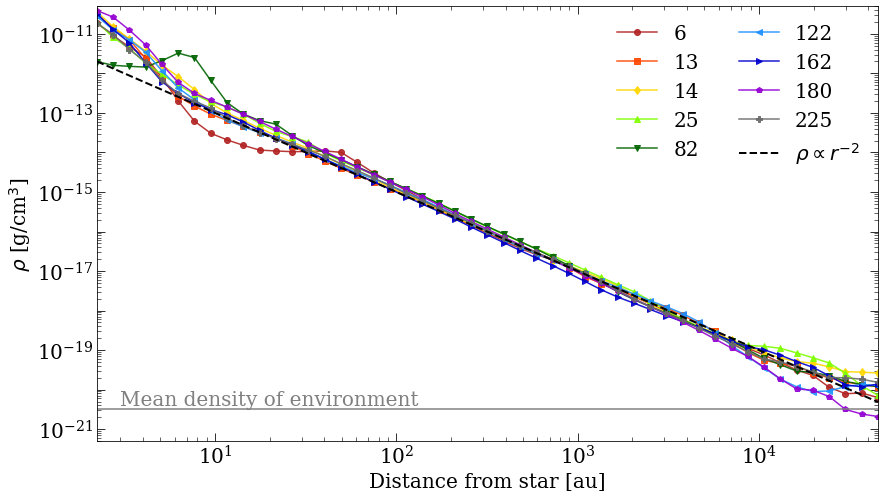

In [18]:
fig, axs = plt.subplots(figsize = (14,8))


axs.set(ylabel = '$ρ$ [g/cm$^3$]', xlabel = 'Distance from star [au]', ylim = (5e-22, 5e-11), xlim = (r_plot[0], r_plot[-1]))


for i, sink in enumerate(sinks):
    axs.loglog(r_plot, coredensprofile_data[sink], marker = markers[i], label = sink, color = colors[i], alpha = 0.9)

axs.loglog(r_plot, 1e-11*r_plot**(-2), ls = '--',  color = 'black', label = '$ρ\propto r^{-2}$', lw = 2)
nticks = 12
maj_loc = mpl.ticker.LogLocator(numticks=nticks)
min_loc = mpl.ticker.LogLocator(subs='all', numticks=nticks)
axs.yaxis.set_major_locator(maj_loc)
axs.yaxis.set_minor_locator(min_loc)

for index, label in enumerate(axs.yaxis.get_ticklabels()):
    if index % 2 != 0:
        label.set_visible(False)

axs.text(3, 4e-21, 'Mean density of environment', color = 'grey')
axs.axhline(mean_dens, color = 'grey')


plt.legend(frameon = False, ncol = 2)
plt.savefig(save_folder + 'core_densityprofile', facecolor = 'w', bbox_inches='tight', dpi = 500)
